I. Set Up

In [30]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from pathlib import Path
import glob
import ipywidgets as widgets
from IPython.display import clear_output
import random
import math
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
import astropy.stats as astats
import hepstats
from hepstats import *
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
from ciao_contrib.runtool import search_csc, obsid_search_csc
from sherpa.astro import ui
import bxa.sherpa as bxa

# CUSTOM Imports
from data_exploration_functions import *
from data_extraction_functions import *
from data_representation_functions import *

def list_folders_fun(path):
    """
    DESCRIPTION: List folders in a given directory.
    INPUT: Directory path
    OUTPUT: Folder names in a given directory
    """
    folder_list = [f.name for f in Path(path).iterdir() if f.is_dir()]
    return folder_list

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', options=('Full', 'All', 'Full_extra', 'New', 'Bona'), value='Full')

II. Load Data

In [31]:
# from matplotlib.colors import LogNorm
# from sherpa.astro import ui
# Set ID
set_id = set_widget.value

df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id[0:4]}.csv')
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id[0:4]}.csv')

df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id[0:4]}.csv')
df_properties_global['obsreg_id'] = df_properties_global['obsid'].astype(str) + '_' + df_properties_global['region_id'].astype(str)

df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
print("Number of Property Sets: ", df_properties_group.ngroups)

#print("ObsID and RegID: ", df_eventfiles_group.groups.keys())
df_properties_global.head()

Number of Eventfiles:  95473
Number of Property Sets:  95473


,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,streak_src_flag,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_w,flux_aper_lolim_w,flux_aper_hilim_w,flux_aper_avg_b,flux_aper_avg_lolim_b,flux_aper_avg_hilim_b,flux_aper_avg_w,flux_aper_avg_lolim_w,flux_aper_avg_hilim_w,obsid,obi,gti_obs,gti_end,region_id,theta,phi,flux_significance_b,flux_significance_w,likelihood_b,likelihood_w,conf_code,extent_code,sat_src_flag.1,streak_src_flag.1,var_code,major_axis_b,minor_axis_b,pos_angle_b,major_axis_w,minor_axis_w,pos_angle_w,cnts_aper_b,cnts_aperbkg_b,cnts_aper_w,src_cnts_aper_b,src_cnts_aper_w,src_rate_aper_b,src_rate_aper_w,flux_aper_b.1,flux_aper_lolim_b.1,flux_aper_hilim_b.1,flux_aper_w.1,flux_aper_lolim_w.1,flux_aper_hilim_w.1,hard_hm,hard_hm_lolim,hard_hm_hilim,hard_ms,hard_ms_lolim,hard_ms_hilim,hard_hs,hard_hs_lolim,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id
0,2CXO J000000.5-575830,0.002735,-57.975181,2.819565,1.667655,91.090421,8.522222,TRUE,True,False,False,3.434509e-14,2.608488e-14,4.217055e-14,NaN,NaN,NaN,3.434509e-14,2.608488e-14,4.217055e-14,NaN,NaN,NaN,9335,0,2009-03-16T22:23:26,2009-03-17T06:52:35,26,11.120887,118.877460,8.522222,NaN,139.665996,NaN,15,0,False,False,0,4.499015,4.499015,0.0,NaN,NaN,NaN,184,2262,NaN,125.766949,NaN,0.004172,NaN,3.434509e-14,2.608488e-14,4.217055e-14,NaN,NaN,NaN,0.168645,-0.004372,0.320425,-0.523423,-0.611493,-0.427858,-0.396002,-0.524047,-0.267958,0.085129,0.121377,0.376451,0.175421,0.0,NaN,30146.733203,ACIS-6,9335_26
1,2CXO J000001.7+003824,0.007280,0.640146,1.093394,0.871849,104.849964,5.485207,TRUE,False,False,False,1.662168e-14,1.325999e-14,1.979660e-14,NaN,NaN,NaN,1.662168e-14,1.325999e-14,1.979660e-14,NaN,NaN,NaN,11591,0,2009-08-13T14:18:14,2009-08-13T20:58:47,1,4.582817,8.452166,5.485207,NaN,110.292372,NaN,0,0,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,43,63,NaN,42.823196,NaN,0.001805,NaN,1.662168e-14,1.325999e-14,1.979660e-14,NaN,NaN,NaN,0.317302,0.108057,0.505309,-0.258588,-0.454091,-0.046846,0.063710,-0.145534,0.269207,0.612624,0.585561,0.519756,0.678199,1.0,NaN,23719.527217,ACIS-7,11591_1
2,2CXO J000002.4+004444,0.010189,0.745732,0.746484,0.723548,34.468703,5.774224,TRUE,False,False,False,1.448938e-14,1.200382e-14,1.682874e-14,NaN,NaN,NaN,1.448938e-14,1.200382e-14,1.682874e-14,NaN,NaN,NaN,11591,0,2009-08-13T14:18:14,2009-08-13T20:58:47,22,2.397741,240.839479,5.774224,NaN,224.178117,NaN,1,0,False,False,0,NaN,NaN,NaN,NaN,NaN,NaN,46,7,NaN,49.253422,NaN,0.002076,NaN,1.448938e-14,1.200382e-14,1.682874e-14,NaN,NaN,NaN,-0.043723,-0.261711,0.161774,-0.152405,-0.319176,0.023111,-0.198626,-0.400375,0.003123,0.425172,0.465109,0.489993,0.754087,0.0,NaN,23719.527217,ACIS-7,11591_22
3,2CXO J000002.4+321750,0.010280,32.297465,1.067836,0.944977,115.769199,5.028571,TRUE,False,False,False,0.000000e+00,0.000000e+00,2.181124e-15,NaN,NaN,NaN,0.000000e+00,0.000000e+00,2.181124e-15,NaN,NaN,NaN,20515,0,2018-02-04T04:46:58,2018-02-04T11:44:40,8,6.908982,27.688648,5.028571,NaN,90.630192,NaN,1,0,False,False,0,1.727232,1.727232,0.0,NaN,NaN,NaN,42,95,NaN,37.133226,NaN,0.001501,NaN,0.000000e+00,0.000000e+00,2.181124e-15,NaN,NaN,NaN,0.483448,0.297939,0.655215,-0.683323,-0.860087,-0.312929,-0.208620,-0.497814,0.222986,0.154076,0.177304,0.548595,NaN,0.0,NaN,24735.257397,ACIS-3,20515_8
4,2CXO J000002.9-350332,0.012314,-35.059185,0.855386,0.735828,172.590089,16.266113,TRUE,False,False,False,3.589425e-13,3.363125e-13,3.815725e-13,NaN,NaN,NaN,3.589425e-13,3.363125e-13,3.815725e-13,NaN,NaN,NaN,15712,0,2013-10-23T21:00:50,2013-10-23T23:48:38,4,5.606038,162.925240,16.266113,NaN,1506.051665,NaN,0,16,False,False,0,1.408083,1.408083,0.0,NaN,NaN,NaN,336,33,NaN,343.620909,NaN,0.034579,NaN,3.589425e-13,3.363125e-13,3.815725e-13,NaN,NaN,NaN,-0.042473,-0.121799,0.035603,-0.405996,-0.462836,-0.345409,-0.440974,-0.502811,-0.377889,0.067012,0.113151,0.235485,0.080282,0.0,NaN,9937.243792,ACIS-6,15

Spectrum

In [32]:
obsid = '23022'
regionid = '122'
obsreg_id = obsid + '_' + regionid
selected = df_properties_global[df_properties_global['obsreg_id']==obsreg_id ]
pd.set_option('display.max_columns', None)
selected.head()

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,streak_src_flag,flux_aper_b,flux_aper_lolim_b,flux_aper_hilim_b,flux_aper_w,flux_aper_lolim_w,flux_aper_hilim_w,flux_aper_avg_b,flux_aper_avg_lolim_b,flux_aper_avg_hilim_b,flux_aper_avg_w,flux_aper_avg_lolim_w,flux_aper_avg_hilim_w,obsid,obi,gti_obs,gti_end,region_id,theta,phi,flux_significance_b,flux_significance_w,likelihood_b,likelihood_w,conf_code,extent_code,sat_src_flag.1,streak_src_flag.1,var_code,major_axis_b,minor_axis_b,pos_angle_b,major_axis_w,minor_axis_w,pos_angle_w,cnts_aper_b,cnts_aperbkg_b,cnts_aper_w,src_cnts_aper_b,src_cnts_aper_w,src_rate_aper_b,src_rate_aper_w,flux_aper_b.1,flux_aper_lolim_b.1,flux_aper_hilim_b.1,flux_aper_w.1,flux_aper_lolim_w.1,flux_aper_hilim_w.1,hard_hm,hard_hm_lolim,hard_hm_hilim,hard_ms,hard_ms_lolim,hard_ms_hilim,hard_hs,hard_hs_lolim,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id
27751,2CXO J051117.2-672556,77.822016,-67.432396,1.859151,1.339932,5.1285,11.642147,TRUE,True,False,False,0.0,0.0,9.789457e-16,NaN,NaN,NaN,3.314104e-16,0.0,9.942313e-16,NaN,NaN,NaN,23022,0,2020-05-15T12:05:31,2020-05-15T19:03:13,122,11.745694,354.883179,11.642147,NaN,327.572054,NaN,15,0,False,False,28,4.864212,4.864212,0.0,NaN,NaN,NaN,219,716,NaN,192.076596,NaN,0.007765,NaN,1.915948e-13,1.651249e-13,2.180647e-13,NaN,NaN,NaN,0.7208,0.662711,0.777639,-0.276077,-0.491568,0.053092,0.607121,0.452842,0.785134,1.0,1.0,1.0,NaN,10.0,NaN,24734.882334,ACIS-8,23022_122


read ARF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_arf3.fits
read RMF file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_rmf3.fits
read background file /Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/acisf23022_000N027_r0122_pha3.fits
dataset 1: 0.0073:14.9504 -> 0.511:14.9504 Energy (keV)
dataset 1: 0.511:14.9504 -> 0.511:7.9862 Energy (keV)
23


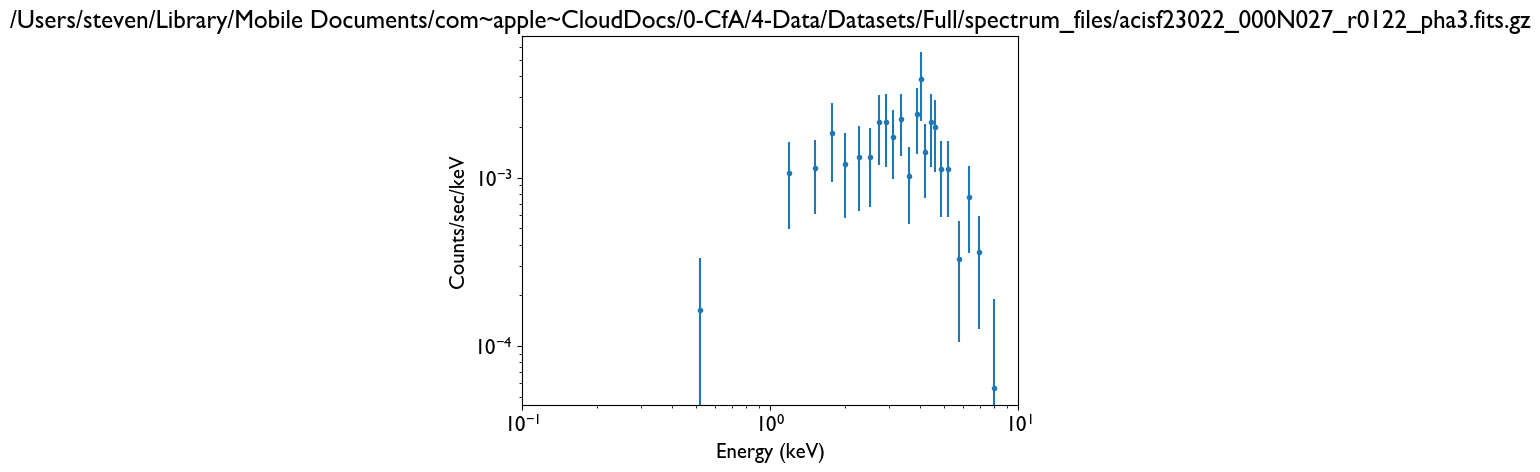

In [46]:
folder = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets/Full/spectrum_files/'
event_filename = [evtf for evtf in glob.iglob(f'{folder}/acisf*regevt3.fits.gz') if str(obsid) in evtf and str(regionid) in evtf][0]
region_filename = [region for region in glob.iglob(f'{folder}/acisf*reg3.fits.gz') if str(obsid) in region and str(regionid) in region][0]
pha_filename = [spec for spec in glob.iglob(f'{folder}/acisf*pha3.fits.gz') if str(obsid) in spec and str(regionid) in spec][0]
ui.load_pha(pha_filename)

ui.ignore('0.:0.5,8.0:')
ui.subtract()
# ui.notice_id(1,0.3,7.)
ui.group_counts(10)

ui.set_ylog()
ui.set_xlog()
ui.plot_data()
plt.xlim(1E-1,10)

# Get the data plot information
data_plot = ui.get_data_plot()

# Extract the x and y values from the data plot
x = data_plot.x
y = data_plot.y

# Get the number of data points
num_data_points = len(x)
print(num_data_points)


Spectral Fit (absorbed powerlaw)

In [120]:
import corner
ui.set_stat('chi2gehrels')
ui.set_analysis('ener')
# Set the source model
ui.set_source('xsphabs.abs1 * xspowerlaw.p1')
p1.norm.min = 0.0000001
# abs1.nH.min = 0.0001
abs1.nH = 0.251
# p1.ref = 1
# ui.freeze(p1.ref)
ui.freeze(abs1.nH)
ui.show_model()
ui.guess(p1)
ui.show_model()
# parameters we want to vary
param1 = p1.PhoIndex
param2 = p1.norm
# param3 = abs1.nH

# list of parameters
parameters = [param1, param2] #,param3]
number_param = len(parameters)
# list of prior transforms
priors = [
   bxa.create_uniform_prior_for(param1),
   bxa.create_loguniform_prior_for(param2), 
   # bxa.create_loguniform_prior_for(param3), 
#    bxa.create_uniform_prior_for(param3),
#    bxa.create_loguniform_prior_for(param4),     
]

# make a single function:
priorfunction = bxa.create_prior_function(priors)

# Get DOF
print(ui.calc_stat_info())

# see the pymultinest documentation for all options
solver = bxa.BXASolver(prior=priorfunction, parameters=parameters,
             outputfiles_basename = "myoutputs_test456/")
results = solver.run(resume=True)\

component = abs1 + p1
ui.sample_flux(component, 0.3, 7.2, num=1000, correlated=True)

# Extract the cstat value
# fit_results = ui.get_fit_results()
# cstat = fit_results.statval
# print("Cstat value:", cstat)

data_plot = ui.get_data_plot()
model_plot = ui.get_model_plot()
delchi_plot = ui.get_delchi_plot()

##
samples = np.array(results['samples'])

# Get the parameter names
param_names = [param.name for param in parameters]

# Extract data for each parameter
data = [samples[:, i] for i in range(len(param_names))]



stdd1 = np.std(data[0])
mean1 = np.mean(data[0])
print(mean1, stdd1)
stdd2 = np.std(data[1])
mean2 = np.mean(data[1])
print(mean2, stdd2)




Model: 1
apply_rmf(apply_arf((24735.003845673 * (xsphabs.abs1 * xspowerlaw.p1))))
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   abs1.nH      frozen        0.251        0.001            3 10^22 atoms / cm^2
   p1.PhoIndex  thawed     0.354497           -3           10           
   p1.norm      thawed  8.30345e-06        1e-07     0.129192           

Model: 1
apply_rmf(apply_arf((24735.003845673 * (xsphabs.abs1 * xspowerlaw.p1))))
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   abs1.nH      frozen        0.251        0.001            3 10^22 atoms / cm^2
   p1.PhoIndex  thawed     0.354497           -3           10           
   p1.norm      thawed  0.000129192  1.29192e-07     0.129192           

Dataset               = 1
Statistic             = chi2gehrels
Fit statistic value   = 16

[ultranest] Explored until L=-6  34 [-6.4420..-6.4414]*| it/evals=3760/5359 eff=inf% N=400 0 0  0 0  
[ultranest] Likelihood function evaluations: 5359
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -13.41 +- 0.07486
[ultranest] Effective samples strategy satisfied (ESS = 1641.7, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.11, need <0.5)
[ultranest]   logZ error budget: single: 0.12 bs:0.07 tail:0.09 total:0.11 required:<0.50
[ultranest] done iterating.

logZ = -13.409 +- 0.183
  single instance: logZ = -13.409 +- 0.122
  bootstrapped   : logZ = -13.414 +- 0.161
  tail           : logZ = +- 0.086
insert order U test : converged: True correlation: inf iterations

    p1.PhoIndex         : -0.70 │ ▁ ▁▁▁▁▁▁▁▁▂▃▄▄▄▅▆▇▇▇▇▆▅▄▃▂▂▁▁▁▁▁▁▁ ▁▁ │1.40      0.35 +- 0.23
    p1.norm             : 

In [122]:
import corner
ui.set_stat('chi2gehrels')
ui.set_analysis('ener')
# Set the source model
ui.set_source('xsphabs.abs2 * xspowerlaw.p2')
p2.norm.min = 0.0000001
abs2.nH.min = 0.00001
# abs1.nH.max = 3
# abs1.nH = 0.251
# p1.ref = 1
# ui.freeze(p1.ref)
# ui.freeze(abs1.nH)
ui.show_model()
ui.guess(p2)
ui.show_model()
# parameters we want to vary
param1_2 = p2.PhoIndex
param2_2 = p2.norm
param3_2 = abs2.nH

# list of parameters
parameters2 = [param1_2, param2_2,param3_2] #,param3]
number_param2 = len(parameters2)
# list of prior transforms
priors2 = [
   bxa.create_uniform_prior_for(param1_2),
   bxa.create_loguniform_prior_for(param2_2), 
   bxa.create_loguniform_prior_for(param3_2), 
#    bxa.create_uniform_prior_for(param3),
#    bxa.create_loguniform_prior_for(param4),     
]

# make a single function:
priorfunction2 = bxa.create_prior_function(priors2)

# Get DOF
print(ui.calc_stat_info())

# see the pymultinest documentation for all options
solver2 = bxa.BXASolver(prior=priorfunction2, parameters=parameters2,
             outputfiles_basename = "myoutputs_test79/")
results2 = solver2.run(resume=True)\

component2 = abs2 + p2
ui.sample_flux(component2, 0.3, 7.7, num=1000, correlated=True)

# Extract the cstat value
# fit_results = ui.get_fit_results()
# cstat = fit_results.statval
# print("Cstat value:", cstat)

data_plot2 = ui.get_data_plot()
model_plot2 = ui.get_model_plot()
delchi_plot2 = ui.get_delchi_plot()

# Get the parameter samples
samples2 = np.array(results2['samples'])

# Get the parameter names
param_names2 = [param.name for param in parameters2]
data2 = [samples2[:, i] for i in range(len(param_names2))]


stdd1 = np.std(data2[0])
mean1 = np.mean(data2[0])
print(mean1, stdd1)
stdd2 = np.std(data2[1])
mean2 = np.mean(data2[1])
print(mean2, stdd2)
stdd3 = np.std(data2[2])
mean3 = np.mean(data2[2])
print(mean3, stdd3)

Model: 1
apply_rmf(apply_arf((24735.003845673 * (xsphabs.abs2 * xspowerlaw.p2))))
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   abs2.nH      thawed      20895.3        1e-05        1e+06 10^22 atoms / cm^2
   p2.PhoIndex  thawed      -2.1786           -3           10           
   p2.norm      thawed  2.92008e-06        1e-07     0.129192           

Model: 1
apply_rmf(apply_arf((24735.003845673 * (xsphabs.abs2 * xspowerlaw.p2))))
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   abs2.nH      thawed      20895.3        1e-05        1e+06 10^22 atoms / cm^2
   p2.PhoIndex  thawed      -2.1786           -3           10           
   p2.norm      thawed  0.000129192  1.29192e-07     0.129192           

Dataset               = 1
Statistic             = chi2gehrels
Fit statistic value   = 91

[ultranest] Explored until L=-6  85 [-5.9591..-5.9587]*| it/evals=3000/17199 eff=16.7867% N=220   0 0    
[ultranest] Likelihood function evaluations: 17202
[ultranest] Writing samples and results to disk ...
[ultranest] Writing samples and results to disk ... done
[ultranest]   logZ = -14.25 +- 0.1298
[ultranest] Effective samples strategy satisfied (ESS = 950.3, need >400)
[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.45+-0.10 nat, need <0.50 nat)
[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.13, need <0.5)
[ultranest]   logZ error budget: single: 0.18 bs:0.13 tail:0.01 total:0.13 required:<0.50
[ultranest] done iterating.

logZ = -14.302 +- 0.315
  single instance: logZ = -14.302 +- 0.131
  bootstrapped   : logZ = -14.249 +- 0.315
  tail           : logZ = +- 0.010
insert order U test : converged: True correlation: inf iterations

    p2.PhoIndex         : -1.03 │ ▁▁▁▂▃▆▇▅▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁ ▁▁▁ ▁ ▁     ▁ │5.81      0.53 +- 0.59
    p2.norm            

In [112]:
# Get the parameter samples
samples2 = np.array(results2['samples'])

# Get the parameter names
param_names2 = [param.name for param in parameters2]
data2 = [samples2[:, i] for i in range(len(param_names2))]

stdd1 = np.std(data2[0])
mean1 = np.mean(data2[0])
print(mean1, stdd1)
stdd2 = np.std(data2[1])
mean2 = np.mean(data2[1])
print(mean2, stdd2)
stdd3 = np.std(data2[2])
mean3 = np.mean(data2[2])
print(mean3, stdd3)

0.49772080286349124 0.5932562068706607
2.5377317429330462e-05 0.00025419805603049174
0.6034334501161994 1.070766504243023


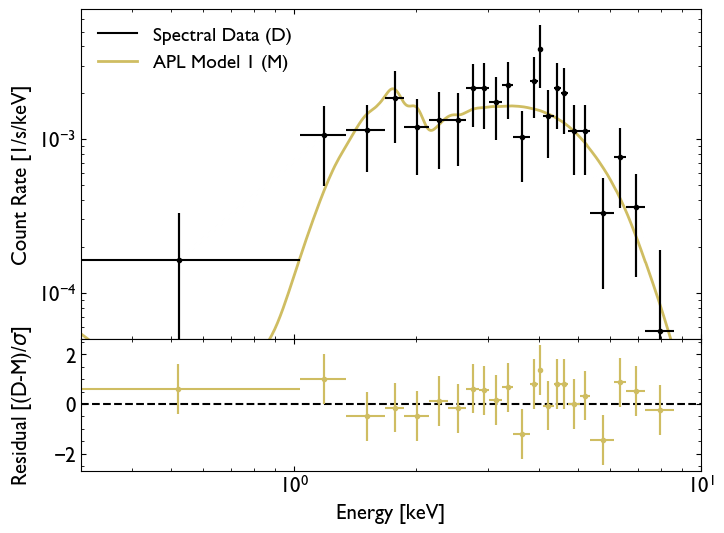

In [123]:
# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'
# plt.xlabel('Energy [keV]')
# plt.ylabel('Count Rate [1/s/keV]')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6),gridspec_kw={'height_ratios': [5, 2]},sharex=True)
col='black'
colfit=gold
colfit2=gold
col2 = gold
# Plot the data and model fit on ax1
ax1.plot(data_plot.x, data_plot.y, color=col, label='Spectral Data (D)',linestyle='-')
ax1.plot(data_plot.x, data_plot.y, color='white',linewidth=3)
ax1.errorbar(data_plot.x, data_plot.y, yerr=data_plot.yerr,xerr = None, fmt='.', color = col,linewidth = 1.5,capsize = 0) #capsize 2
ax1.plot(model_plot.x, model_plot.y, color=colfit, label='APL Model 1 (M)',linewidth = 2)
# ax1.plot(model_plot2.x, model_plot2.y, color=colfit2, label='Model 2',linewidth = 1,linestyle='--')
ax1.set_ylabel('Count Rate [1/s/keV]')
ax1.set_xlim(0.3, 10)
ax1.set_ylim(5*10e-6, 7*10e-4)
ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.tick_params(which='both', direction='in', top=True, right=True)
ax1.minorticks_on()
ax1.legend(loc='upper left', frameon=False, fontsize = 14)

# Add x-error bars as lines
for x, y, yerr, xlo, xhi in zip(data_plot.x, data_plot.y, data_plot.yerr, data_plot.xlo, data_plot.xhi):
    ax1.errorbar(x, y, yerr=yerr, xerr=[[x - xlo], [xhi - x]], fmt='none', ecolor=col, linewidth=1.5, capsize=0)


# Compute and plot the residuals on ax2
ax2.plot(delchi_plot.x, delchi_plot.y, color=col,linestyle='')
ax2.axhline(0, color='black', linestyle='--') 
# ax2.plot(delchi_plot.x, delchi_plot.y, color='white',linewidth=3)
ax2.errorbar(delchi_plot.x, delchi_plot.y, yerr=delchi_plot.yerr,xerr =None, fmt='.', color = col2,linewidth = 1.5,capsize = 0) #capsize 2
ax2.set_xlabel('Energy [keV]')
ax2.set_ylabel(r'Residual [(D-M)/$\sigma$]',labelpad=14)
# ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.tick_params(which='both', direction='in', top=True, right=True)
ax2.minorticks_on()

# Add x-error bars as lines
for x, y, yerr, xlo, xhi in zip(delchi_plot.x, delchi_plot.y, delchi_plot.yerr, data_plot.xlo, data_plot.xhi):
    ax2.errorbar(x, y, yerr=yerr, xerr=[[x - xlo], [xhi - x]], fmt='none', ecolor=col2, linewidth=1.5, capsize=0)

plt.subplots_adjust(hspace=0)
# plt.tight_layout()
plt.show()



0.23396213522956444
2.3863386567341975e-06


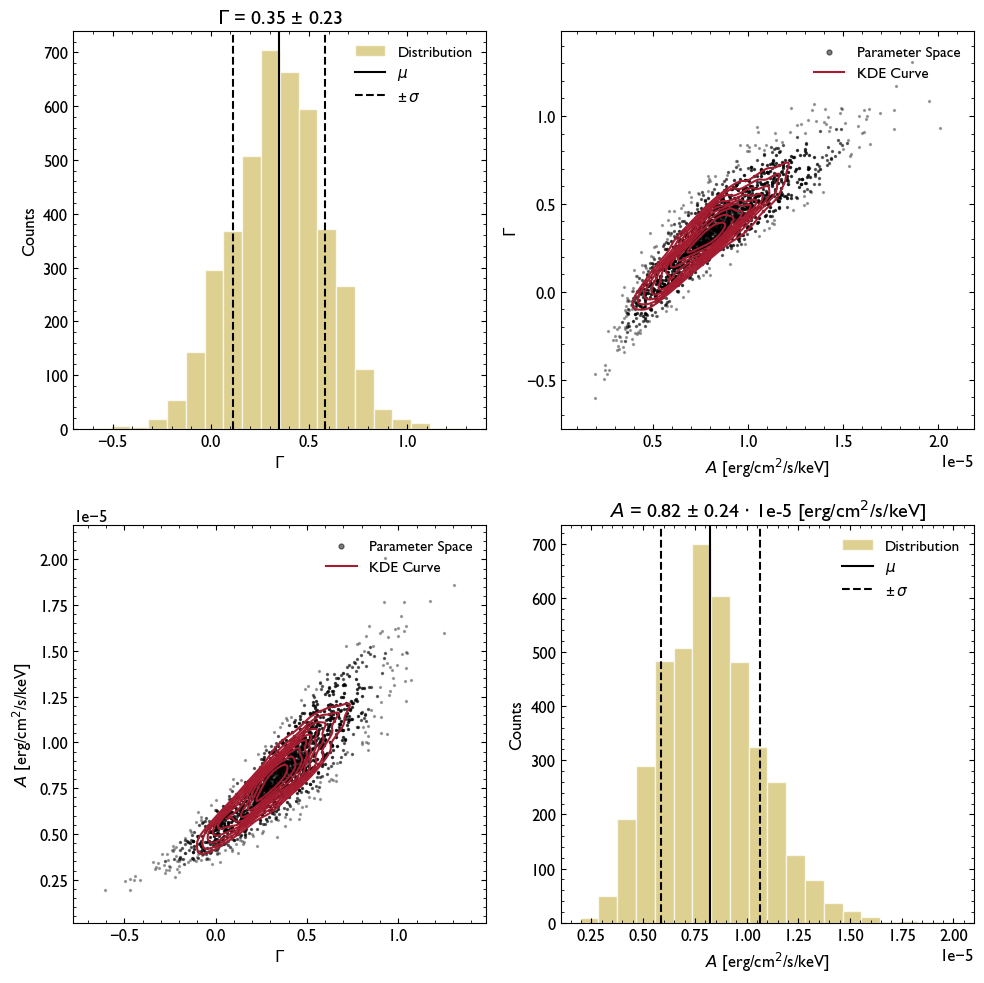

In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'

plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'

# Get the parameter samples
samples = np.array(results['samples'])

# Get the parameter names
param_names = [param.name for param in parameters]

# Extract data for each parameter
data = [samples[:, i] for i in range(len(param_names))]
stdd1 = np.std(data[0])
print(stdd1)
stdd2 = np.std(data[1])
print(stdd2)

# Plot the corner plot
fig, axes = plt.subplots(len(param_names), len(param_names), figsize=(10, 10))

for i in range(len(param_names)):
    for j in range(len(param_names)):
        if i == j:
            # Histogram and KDE on diagonal
            axes[i, j].hist(data[i], bins=20, color=gold, edgecolor='white',alpha=0.7,label='Distribution')
            # Add indicator for one standard deviation away from the mean
            std_dev = np.std(data[i])
            mean = np.mean(data[i])
            # Add mean indicator
            axes[i, j].axvline(mean, color='black', linestyle='-', label=r'$\mu$')
            axes[i, j].axvline(mean - std_dev, color='black', linestyle='--', label=r'±$\,\sigma$')
            axes[i, j].axvline(mean + std_dev, color='black', linestyle='--')
            axes[i, j].tick_params(which='both', direction='in', top=True, right=True)
            if i ==0:
                axes[i, j].set_title(r'$\Gamma$ '+ f'= {mean :.2f} ± {std_dev:.2f}')
            else: 
                axes[i, j].set_title(r'$A$ '+ f'= {mean*100000 :.2f} ± {std_dev*100000:.2f} ' + r'$\cdot$ 1e-5 [erg/cm$^{2}$/s/keV]')

            axes[i, j].legend(loc='upper right', frameon=False, fontsize = 11)
            axes[i, j].minorticks_on()
        else:
            # Scatter plot off-diagonal
            axes[i, j].scatter(data[j], data[i], color='black', alpha = 0.3, s=2)
            # Add KDE curve
            sns.kdeplot(x=data[j], y=data[i], ax=axes[i, j], legend=True, color=harvard, label='KDE',thresh=0.25)

            custom_markers = [plt.scatter([], [], marker='.', color='black', alpha = 0.5,edgecolor='black', s=50),
                  plt.Line2D([], [], linestyle='-',color=harvard)]
            axes[i, j].tick_params(which='both', direction='in', top=True, right=True)
            axes[i, j].minorticks_on()
            axes[i, j].legend(handles=custom_markers, labels=['Parameter Space', 'KDE Curve'],loc='upper right', frameon=False, fontsize = 11)
            

        axes[0, 0].set_ylabel('Counts')
        axes[0, 0].set_xlabel(r'$\Gamma$')
        axes[0, 1].set_ylabel(r'$\Gamma$')
        axes[0, 1].set_xlabel(r'$A$ [erg/cm$^{2}$/s/keV]')
        axes[1, 0].set_xlabel(r'$\Gamma$')
        axes[1, 1].set_xlabel(r'$A$ [erg/cm$^{2}$/s/keV]')
        axes[1, 1].set_ylabel('Counts')
        axes[1, 0].set_ylabel(r'$A$ [erg/cm$^{2}$/s/keV]')
        # axes[0, 0].set_xlabel(param_names[j])
        # axes[0, 0].set_xlabel(param_names[j])
        # axes[0, 0].set_xlabel(param_names[j])

plt.tight_layout()
plt.show()



logZ = -13.822 +- 0.297
  single instance: logZ = -13.822 +- 0.127
  bootstrapped   : logZ = -13.800 +- 0.286
  tail           : logZ = +- 0.082
insert order U test : converged: True correlation: inf iterations

    p1.gamma            : -0.66 │ ▁▁▁▁▁▁▁▁▁▁▂▂▄▄▅▅▇▇▇▇▆▅▅▄▃▂▂▁▁▁▁▁▁▁  ▁ │1.38      0.35 +- 0.23
    p1.ampl             : 0.0000008│ ▁▁▁▁▁▂▃▄▅▆▇▇▇▆▇▆▅▄▄▃▂▂▂▁▁▁▁▁▁▁▁     ▁ │0.0000214    0.0000083 +- 0.0000023

    for p1.ampl.min = 0.000001


logZ = -13.822 +- 0.434
  single instance: logZ = -13.822 +- 0.127
  bootstrapped   : logZ = -13.789 +- 0.427
  tail           : logZ = +- 0.082
insert order U test : converged: True correlation: inf iterations

    p1.gamma            : -0.62 │ ▁ ▁▁▁▁▁▁▁▁▂▃▅▄▅▇▇▇▇▆▅▅▄▃▂▁▁▁▁▁▁▁▁   ▁ │1.44      0.35 +- 0.23
    p1.ampl             : 0.0000014│ ▁▁▁▁▂▃▄▅▇▆▇▇▆▇▆▅▄▄▃▂▂▂▁▁▁▁▁▁▁▁  ▁   ▁ │0.0000219    0.0000083 +- 0.0000023

for p1.ampl.min = 0.00001

logZ = -13.822 +- 0.283
  single instance: logZ = -13.822 +- 0.127
  bootstrapped   : logZ = -13.820 +- 0.270
  tail           : logZ = +- 0.082
insert order U test : converged: True correlation: inf iterations

    p1.gamma            : -0.78 │ ▁ ▁▁▁▁▁▁▁▁▂▂▃▄▅▅▇▇▇▇▆▅▅▃▂▁▁▁▁▁ ▁    ▁ │1.54      0.35 +- 0.23
    p1.ampl             : 0.0000006│ ▁▁▁▁▁▁▂▃▄▅▇▆▆▇▆▇▆▅▄▄▃▂▂▂▁▁▁▁▁▁▁▁▁ ▁ ▁ │0.0000203    0.0000083 +- 0.0000023

for p1.ampl.min = 0.0000001 for 10


logZ = -18.439 +- 0.200
  single instance: logZ = -18.439 +- 0.122
  bootstrapped   : logZ = -18.474 +- 0.180
  tail           : logZ = +- 0.088
insert order U test : converged: True correlation: inf iterations

    p1.gamma            : -1.05 │ ▁  ▁▁▁▁▁▁▁▁▂▂▃▃▅▄▇▇▇▇▇▆▅▅▃▂▁▁▁▁▁▁▁▁▁▁ │1.63      0.36 +- 0.30
    p1.ampl             : 0.0000000│ ▁▁▁▂▄▄▅▇▇▇▇▇▇▅▄▃▃▂▁▁▁▁▁▁▁▁▁ ▁       ▁ │0.0000241    0.0000070 +- 0.0000025


for p1.ampl.min = 0.0000001 and 5 count bins

logZ = -17.475 +- 0.194
  single instance: logZ = -17.475 +- 0.123
  bootstrapped   : logZ = -17.491 +- 0.171
  tail           : logZ = +- 0.093
insert order U test : converged: True correlation: inf iterations

    p1.gamma            : -1.00 │ ▁    ▁▁▁▁▁▁▁▁▁▂▂▃▅▄▅▆▇▇▆▆▅▄▃▂▂▁▁▁▁▁▁▁ │1.35      0.39 +- 0.26
    p1.ampl             : 0.0000001│ ▁ ▁▁▁▁▂▃▃▄▄▆▆▆▇▆▆▅▅▄▃▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁ │0.0000183    0.0000077 +- 0.0000024

    for p1.ampl.min = 0.0000001 and 7 count bins


logZ = -19.558 +- 0.140
  single instance: logZ = -19.558 +- 0.099
  bootstrapped   : logZ = -19.577 +- 0.123
  tail           : logZ = +- 0.066

insert order U test : converged: True correlation: inf iterations

    p1.gamma            : -3.6  │ ▁▁▁▁▁▁▁▃▅▇▇▅▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁ ▁▁▁▁▁▁▁▁│10.0      0.4 +- 1.1
    p1.ampl             : 0.0000000│▆▇▇▇▇▆▅▄▃▂▂▁▁▁▁▁▁▁▁▁▁▁▁ ▁▁▁▁▁▁   ▁▁  ▁ │0.0000331    0.0000042 +- 0.0000031


  for p1.ampl.min = 0.0000001 and 1 count bins



logZ = -13.854 +- 0.141
  single instance: logZ = -13.854 +- 0.127
  bootstrapped   : logZ = -13.856 +- 0.109
  tail           : logZ = +- 0.090
insert order U test : converged: True correlation: inf iterations

    p1.gamma            : -0.69 │ ▁ ▁▁▁▁▁▁▁▁▁▂▃▃▄▅▆▆▇▇▇▆▅▅▄▃▂▂▁▁▁▁▁▁▁▁▁ │1.30      0.34 +- 0.23
    p1.ampl             : 0.0000012│ ▁▁▁▁▂▃▄▅▆▇▇▇▇▆▇▄▄▃▃▂▁▂▁▁▁▁▁▁▁▁      ▁ │0.0000220    0.0000082 +- 0.0000023

Text(0.5, 1.0, '')

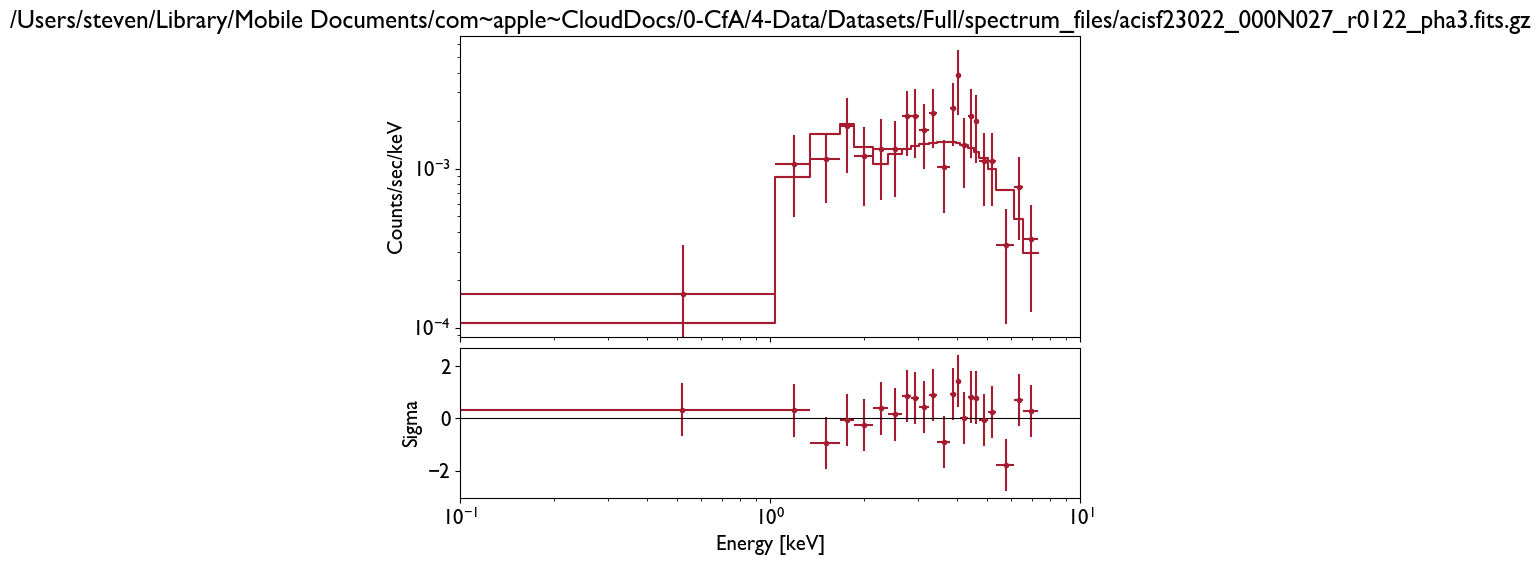

In [588]:
# Define Font Settings
plt.rcParams.update({'font.size': 15})
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Gill Sans'
imperial = '#003E74'
imperial2 = '#002147'
darkblue = '#003170'
harvard = '#A51C30'
silver = '#777777'
silver2 = '#C0C0C0'
gold = '#cfbd62'
# plt.xlabel('Energy [keV]')
# plt.ylabel('Count Rate [1/s/keV]')
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ui.set_ylinear()
ui.set_xlinear()
ui.plot_fit_delchi(xlog=True, ylog=True,xerrorbars=True,color=harvard)
# ui.plot_model(xlog=True, ylog=True,xerrorbars=True,color=harvard)
# ui.plot_delchi(xlog=True, ylog=True,xerrorbars=True,color=harvard)
plt.xlim(1E-1,10)
plt.xlabel('Energy [keV]')
plt.title('')


In [93]:
from scipy.stats import chi2

# Specify the desired confidence level (e.g., 95%)
confidence_level = 0.99

# Specify the degrees of freedom (df)
df = num_data_points - number_param
df2 = num_data_points - number_param2

# Calculate the critical chi-square value
critical_value = chi2.ppf(1-confidence_level, df)
critical_value2 = chi2.ppf(1-confidence_level, df2)

# Print the critical value
print("Critical chi-square value:", critical_value)
print("Critical chi-square value:", critical_value2)

Critical chi-square value: 8.897197942077216
Critical chi-square value: 8.260398332546398


In [196]:
# print(model_plot)
fit_plot = ui.get_fit_plot()
print(fit_plot.modelplot)


xlo    = [7.3000e-03,1.0366e+00,1.3432e+00,1.6790e+00,1.8688e+00,2.1462e+00,
 2.3944e+00,2.6572e+00,2.8470e+00,3.0222e+00,3.2558e+00,3.4602e+00,
 3.8106e+00,3.9858e+00,4.0880e+00,4.3508e+00,4.5260e+00,4.7158e+00,
 5.0370e+00,5.3582e+00,6.1320e+00,6.5554e+00,7.3000e+00]
xhi    = [1.0366,1.3432,1.679 ,1.8688,2.1462,2.3944,2.6572,2.847 ,3.0222,3.2558,
 3.4602,3.8106,3.9858,4.088 ,4.3508,4.526 ,4.7158,5.037 ,5.3582,6.132 ,
 6.5554,7.3   ,8.614 ]
y      = [0.0001,0.0009,0.0017,0.0019,0.0014,0.0011,0.0012,0.0013,0.0014,0.0014,
 0.0014,0.0015,0.0015,0.0014,0.0014,0.0013,0.0013,0.0011,0.001 ,0.0007,
 0.0005,0.0003,0.0001]
xlabel = Energy (keV)
ylabel = Counts/sec/keV
title  = Model
histo_prefs = {'xerrorbars': False, 'yerrorbars': False, 'ecolor': None, 'capsize': None, 'barsabove': False, 'xlog': False, 'ylog': False, 'linestyle': 'solid', 'drawstyle': 'default', 'color': None, 'alpha': None, 'marker': 'None', 'markerfacecolor': None, 'markersize': None, 'linecolor': None}
